In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("titanic.csv")
df=df[["Age","Sex","Pclass","Survived"]]

In [4]:
df.dropna(inplace=True)
df["Age"].astype(int)
df["Sex"]=df["Sex"].map({"male":0,"female":1})

In [5]:
x=df[["Age","Sex","Pclass"]]
y=df["Survived"]

In [6]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42)

In [7]:
models={
    "Logistic Regression":LogisticRegression(),
    "K-Nearest Neighbours": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes":GaussianNB()
}

In [8]:
result=[]
for name, model in models.items():
    pl=Pipeline([
        ('scaler',StandardScaler()),
        ('classifier',model)
    ])
    pl.fit(x_train,y_train)
    y_pred=pl.predict(x_test)
    result.append({
    'Model Name': name,
    'Accuracy': round(accuracy_score(y_test,y_pred),4),
    'f1 score': round(f1_score(y_test,y_pred),4),
    'MSE': round(mean_squared_error(y_test,y_pred),4),
    })
result_df=pd.DataFrame(result).sort_values(by='Accuracy',ascending=False)
print(result_df.reset_index(drop=True))

             Model Name  Accuracy  f1 score     MSE
0   Logistic Regression    0.7709    0.7133  0.2291
1  K-Nearest Neighbours    0.7709    0.6963  0.2291
2                   SVM    0.7709    0.6917  0.2291
3         Decision Tree    0.7654    0.6957  0.2346
4         Random Forest    0.7654    0.7000  0.2346
5           Naive Bayes    0.7654    0.7000  0.2346


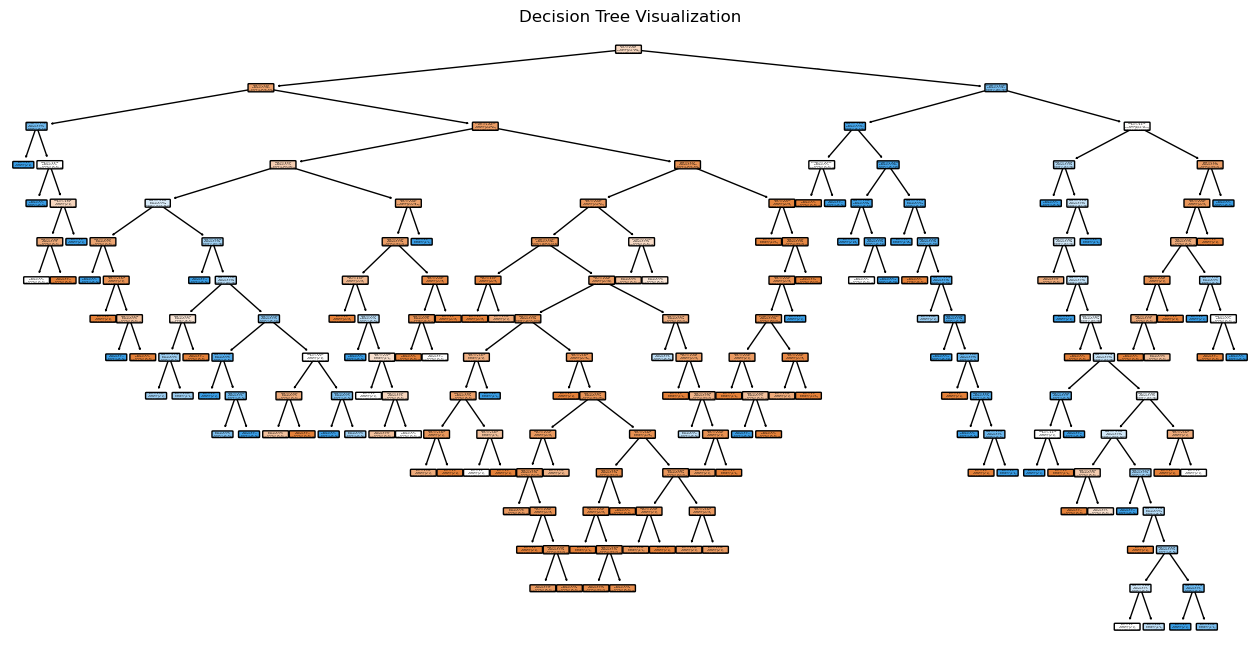

In [9]:
tree_model = models["Decision Tree"]
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', tree_model)
])
tree_pipeline.fit(x_train, y_train)
plt.figure(figsize=(16, 8))
plot_tree(tree_pipeline.named_steps['classifier'],
          feature_names=['age', 'sex', 'pclass'],
          class_names=['Not Survived', 'Survived'],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [18]:
while(True):
    i=int(input(print("press 1 to predict any passenger survival")))
    if i==1:
        a=int(input(print("Enter age")))
        s=int(input(print("Enter Sex(0 for male, 1 for female)")))
        c=int(input(print("Enter Passenger's class(1,2 or 3)")))
        new=pd.DataFrame([[a,s,c]],columns=["Age","Sex","Pclass"])
        result=[]
        for name, model in models.items():
            p=Pipeline([
                ("Scaler",StandardScaler()),
                ("Classifier",model)
            ])
            p.fit(x_train,y_train)
            prediction=p.predict(new)
            result.append({
            "Model Name:":name,
            "Prediction":"Survived" if prediction[0]==1 else "Not Survived"
            })
        result_df=pd.DataFrame(result)
        print(result_df.to_string())
    else:
        break;

press 1 to predict any passenger survival


None 1


Enter age


None 20


Enter Sex(0 for male, 1 for female)


None 1


Enter Passenger's class(1,2 or 3)


None 1


            Model Name: Prediction
0   Logistic Regression   Survived
1  K-Nearest Neighbours   Survived
2         Decision Tree   Survived
3         Random Forest   Survived
4                   SVM   Survived
5           Naive Bayes   Survived
press 1 to predict any passenger survival


None 1


Enter age


None 20


Enter Sex(0 for male, 1 for female)


None 0


Enter Passenger's class(1,2 or 3)


None 1


            Model Name:    Prediction
0   Logistic Regression      Survived
1  K-Nearest Neighbours  Not Survived
2         Decision Tree  Not Survived
3         Random Forest  Not Survived
4                   SVM  Not Survived
5           Naive Bayes  Not Survived
press 1 to predict any passenger survival


None 0
